# About this contest

<img src="https://i.imgur.com/4pG8MIf.png" style="width:300px" />

**Motivation for the contest:**

After the [Contest 1 about Algorithms](https://www.hackerrank.com/contests/miraidenshi-1-algorithms/), which was one of the Common steps in the [Programming Curriculum Part 2](https://docs.google.com/document/d/1NZBqZcbv9pRTlL81c7aeVVk5q-cwTUJ5vccvtWbEzIk/edit#heading=h.vvw4vohs2rzk), we logically continued on with Data Structures for the [2nd contest](https://www.hackerrank.com/contests/miraidenshi-2-data-structure/).

# Dynamic Array

https://www.hackerrank.com/contests/miraidenshi-2-data-structure/challenges/dynamic-array

## example

In [14]:
N = 2
Q = 5
queries = [
    '1 0 5',
    '1 1 7',
    '1 0 3',
    '2 1 0',
    '2 1 1'
]

## Code

In [15]:
#N, Q = [int(i) for i in input().strip().split()]

seqList = [[] for i in range(N)]
lastAnswer = 0

for q in range(Q):
    #query = input().strip()
    query = queries[q]
    queryType, x, y = [int(i) for i in query.split()]
    index = x^lastAnswer%N
    if queryType == 1:
        seqList[index].append(y)
    elif queryType == 2:
        seq = seqList[index]
        lastAnswer = seq[y % len(seq)]
        print(lastAnswer)

7
3


# Maximum Element

https://www.hackerrank.com/contests/miraidenshi-2-data-structure/challenges/maximum-element

## Example

In [16]:
N = 10
queries = [
    "1 97",
    "2",
    "1 20",
    "2",
    "1 26",
    "1 20",
    "2",
    "3",
    "1 91",
    "3",
]

## Solution with timeout

In [17]:
#N = int(input().strip())

stack = []

for n in range(N):
    #query = list(map(int, input().strip().split()))
    query = list(map(int, queries[n].split()))
    
    if query[0] == 1:
        stack.append(query[1])
    elif query[0] == 2:
        del stack[-1]
    else:
        print(max(stack))


26
91


Remember the constraints:

    1 ≤ N ≤ 10⁵
    1 ≤ x ≤ 10⁹

## Code


In [18]:
#N = int(input().strip())

stack = [0]

for n in range(N):
    #query = list(map(int, input().strip().split()))
    query = list(map(int, queries[n].split()))
    
    if query[0] == 1:
        stack.append(max(query[1], stack[-1]))
    elif query[0] == 2:
        stack.pop()
    else:
        print(stack[-1])


97

20

26

26
91


# Tree: Height of a Binary Tree

https://www.hackerrank.com/contests/miraidenshi-2-data-structure/challenges/tree-height-of-a-binary-tree

## Example

In [19]:
class Node:
    def __init__(self,info): 
        self.info = info  
        self.left = None  
        self.right = None 
        self.level = None 

    def __str__(self):
        return str(self.info) 

    
class BinarySearchTree:
    def __init__(self): 
        self.root = None

    def create(self, val):  
        if self.root == None:
            self.root = Node(val)
        else:
            current = self.root
         
            while True:
                if val < current.info:
                    if current.left:
                        current = current.left
                    else:
                        current.left = Node(val)
                        break
                elif val > current.info:
                    if current.right:
                        current = current.right
                    else:
                        current.right = Node(val)
                        break
                else:
                    break
                    
                    
def print_list(head):
    print(head.info, head.left, head.right, head.level)
    if head.right:
        print_list(head.right)
    if head.left:
        print_list(head.left)

In [20]:
tree = BinarySearchTree()
#t = int(input())
t = 7

#for _ in range(t):
    #x = int(input())
for x in [3, 2, 1, 5, 4, 6, 7]:
    tree.create(x)
    
print_list(tree.root)

3 2 5 None
5 4 6 None
6 None 7 None
7 None None None
4 None None None
2 1 None None
1 None None None


## code

In [21]:
def height(root, level=-1):
    if not root:
        return level
    level += 1
    return max(height(root.left, level), height(root.right, level))

In [22]:
print(height(tree.root))

3


In [23]:
tree = BinarySearchTree()
t = 9
for x in  [20, 50, 35, 44, 9, 15, 62, 11, 13]:
    tree.create(x)
print(height(tree.root))

4


# Reverse a doubly linked list

https://www.hackerrank.com/contests/miraidenshi-2-data-structure/challenges/reverse-a-doubly-linked-list

## Example

Create nodes for the doubly linked list: NULL <-- 2 <--> 4 <--> 6 --> NULL

In [24]:
class Node(object):
    def __init__(self, data=None, next_node=None, prev_node = None):
        self.data = data
        self.next = next_node
        self.prev = prev_node

In [25]:
input00 = Node()
input01 = Node(2, None, input00)
input00.next = input01
input04 = Node()
input03 = Node(6, input04)
input04.prev = input03
input02 = Node(4, input03, input01)
input01.next = input02
input03.prev = input02

Verify that the example matches the expected list

In [26]:
def print_list(head, result=''):
    arrow = ''
    if head.data and head.next and head.next.data:
        arrow = ' <--> '
    elif head.next and head.next.data:
        arrow = ' <-- '
    elif head.data:
        arrow = ' --> '
    result += '{}{}'.format(head.data or 'NULL', arrow)
    if head.next:
        return print_list(head.next, result)
    else:
        return result

In [27]:
print(print_list(input00))

NULL <-- 2 <--> 4 <--> 6 --> NULL


## Code

```
Reverse NULL:
     input00 = [None, Node(2), None] 
⇒ newInput00 = [None, None, Node(2)]

Reverse 2:
     input01 = [2, None, input00]
⇒ newInput01 = [2, newInput00, None]
```

Therefore, the reverse function should swap prev & head, then call reverse on the next element while giving it the reverse current node as new neighbor

In [28]:
def Reverse(head):
    reversed_head = Node(head.data, head.prev, head.next)
    if not head.next:
        return reversed_head
    head.next.prev = reversed_head
    return Reverse(head.next)

## Test

Now, Test the reverse function

In [29]:
assert print_list(Reverse(input00)) == 'NULL <-- 6 <--> 4 <--> 2 --> NULL'

# Roads and Libraries

https://www.hackerrank.com/contests/miraidenshi-2-data-structure/challenges/torque-and-development

n cities 1 → n

cities connected by m bidirectional roads

citizen can access a library if:
- their city contains a library
- they can travel by road dfrom their city to one with a library

cost to repair a road: c_road dollars

cost to build a library: c_lib dollars

⇒ find minimum cost of making libraries accessible to all citizen

## utils

In [30]:
import networkx as nx
from nxpd import draw

def get_graph(cities, roads):
    G = nx.DiGraph()
    G.graph['dpi'] = 60
    G.add_nodes_from(cities)
    for road in roads:
        road[-1].update({
            'dir': 'both',
            'arrowsize': 0.5,
        })
    G.add_edges_from(roads)
    return G

## example 1

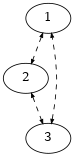

In [31]:
q = 2  # number queries
n = 3  # number cities
m = 3  # number roads
c_lib = 2 # cost to build library
c_road = 1 # cost to repair road
cities = [
    (1, 2),
    (3, 1),
    (2, 3),
]
    
roads = [[*t, {'style': 'dashed'}] for t in cities]
draw(get_graph(range(1, n+1), roads), show='ipynb')

Cheapest cost seems to build 1 library and repair 2 roads for a cost of 4

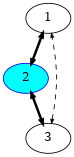

In [32]:
solution_roads = roads[:]
for idx in [0, 2]:
    solution_roads[idx][-1] = {'style': 'filled', 'penwidth': 3}

with_library = {'color': 'blue', 'style': 'filled', 'fillcolor': 'cyan'}

solution_cities = [1, (2, with_library), 3]
draw(get_graph(solution_cities, solution_roads), show='ipynb')

What's the max cost possible ? 

In [33]:
max_cost = n * c_lib
print('Max cost is building a Library in each city: {}'.format(max_cost))

Max cost is building a Library in each city: 6


If cLib < cRoad, then building a library in each city is the cheapest cost

In [34]:
if c_lib < c_road:
    print('cheapest cost is the same: {}'.format(max_cost))
else:
    print('we can find a cheaper cost')

we can find a cheaper cost


## Code

In [35]:
# Returns the size of the group
def dfs_label(road_map, groups, current, label):
    if groups[current] > -1:
        return 0
    groups[current] = label
    total = 0
    for neighbor in road_map[current]:
        total += dfs_label(road_map, groups, neighbor, label)
    return total + 1

def find_min_group_cost(cost_lib, cost_road, group_size):
    single_lib_cost = cost_lib + (cost_road * (group_size - 1))
    multi_lib_cost = cost_lib * group_size
    return min(single_lib_cost, multi_lib_cost)

def find_min_cost(road_map, cost_lib, cost_road):
    groups = list(map(lambda x: -1, road_map))
    sizes = []
    label = 0
    for i in range(1, len(groups)):
        if groups[i] == -1:
            size = dfs_label(road_map, groups, i, label)
            sizes.append(size)
            label += 1
    return sum(map(lambda s: find_min_group_cost(cost_lib, cost_road, s), sizes))


def roadsAndLibraries(n, c_lib, c_road, roads):
    max_cost = n * c_lib
    # If repairing a road costs more than building a lib, return
    if c_lib < c_road:
        return max_cost
    
    road_map = [set() for i in range(n+1)]
    for city_1, city_2 in roads:
        road_map[city_1].add(city_2)
        road_map[city_2].add(city_1)
    
    return find_min_cost(road_map, c_lib, c_road)
    
    

In [36]:
cost = roadsAndLibraries(n, c_lib, c_road, cities)
print('Cheapest cost is {}'.format(cost))

Cheapest cost is 4
